In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

##### Reason of using Roc Curve and Roc_AUC_Score it that, by default for a binary classification the threshhold value is set to 0.5 which means if value is greater than 0.5 then its is classified in 1 and if its less than 0.5 then it is classified as 0, but there will be cases when we have to change the threshold value thats the reson to use ROC_Curve and ROC_AUC_Score

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.045822,-0.137916,-0.080714,2.522038,0.746165,-0.906964,-0.221648,1.014267,-0.541549,0.226619,-0.646359,1.374085,1.009053,0.674110,1.534583,0.479711,-0.912911,2.481945,0.742367,0.231548
1,-0.987260,1.301202,2.377349,0.553914,0.752270,0.064656,0.018317,-1.043610,-0.004103,0.532759,-0.123396,1.203994,-0.379959,0.656015,0.666794,-0.776604,0.260800,0.554458,-0.218921,-0.376086
2,0.573359,0.093756,0.466252,-1.370757,0.010039,0.682971,2.113365,0.626686,1.492389,0.899646,0.435865,2.397674,-1.150714,-0.550760,-0.503923,-1.007000,0.530524,-0.608851,0.799035,-0.171212
3,-0.957644,-1.198484,0.551434,1.677175,0.771950,0.594277,0.642587,0.343373,-0.159067,0.756203,-1.482150,0.487858,1.121529,0.078711,0.773569,0.124356,-0.002483,-0.078416,-0.220112,0.211440
4,-0.963790,-1.544768,-1.287670,1.577101,-1.154661,-1.305605,-1.503319,0.928823,1.919975,-1.610496,-0.469019,0.624567,0.983836,-1.257569,0.766206,0.664644,0.909121,-2.526710,-0.161161,0.759508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.735544,1.764133,-0.638725,1.879423,-2.376723,0.978020,-0.660375,0.490095,1.793999,-0.646840,2.144719,-0.122430,0.515988,1.390353,1.272912,-2.289804,-0.284920,1.681014,2.142480,-1.469109
996,2.249046,-0.266211,-1.140613,-3.719285,1.378505,-0.303544,0.078121,-0.079420,0.619122,-0.988911,1.849376,2.155513,-2.346872,-0.746201,-1.792317,0.981521,1.357610,0.397825,1.354522,-0.961988
997,-0.707372,1.076509,0.585105,1.106683,0.989528,0.159687,-0.453017,-2.925305,-2.059985,0.159872,1.444438,-0.877091,0.655642,0.841409,0.556702,-0.101039,0.000188,-1.513376,0.902399,-0.692310
998,-0.207068,1.173198,-1.944787,2.196572,-1.512070,-0.776757,0.390304,-0.201870,-0.491263,-0.454125,-1.741094,-1.161868,2.639874,-1.104762,0.371236,0.101008,0.534477,-0.328207,1.571192,1.148777


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### Created a dummy model with default 0 as output

In [6]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
## Prediction based on probability
model_prob = model.predict_proba(X_test)    # is simple y_pred

In [9]:
## lets focus on positive outcomes
model_prob
## below output you are seeing it positioned incorrectly there are acctulay two columns one for 0 and 1 and
## another for 1 so in below cell we are using the 1 column

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [10]:
model_prob = model_prob[:,1]    # we are taking only the positvive probability

In [11]:
## Lets calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


#### SEE FORMULAE IN BOOK FOR ROC_CURVE

In [12]:
## CALCULATE ROC_CURVE
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

## the(_) that we are using is threshold that is not required over here if you need threhold just write a variable name there


In [13]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [14]:
model_fpr, model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

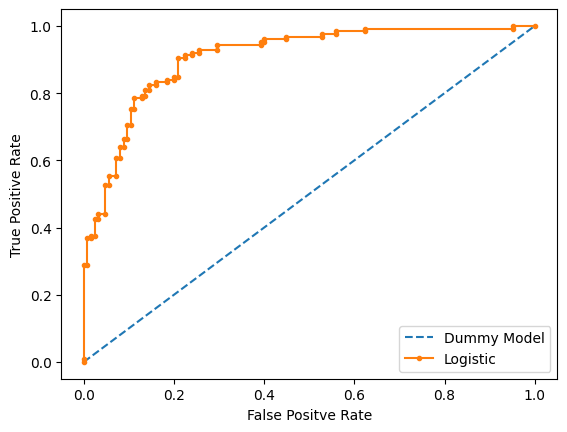

In [15]:
## plot the roc curve for model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label="Logistic")
# axis labels
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

NameError: name 'x' is not defined

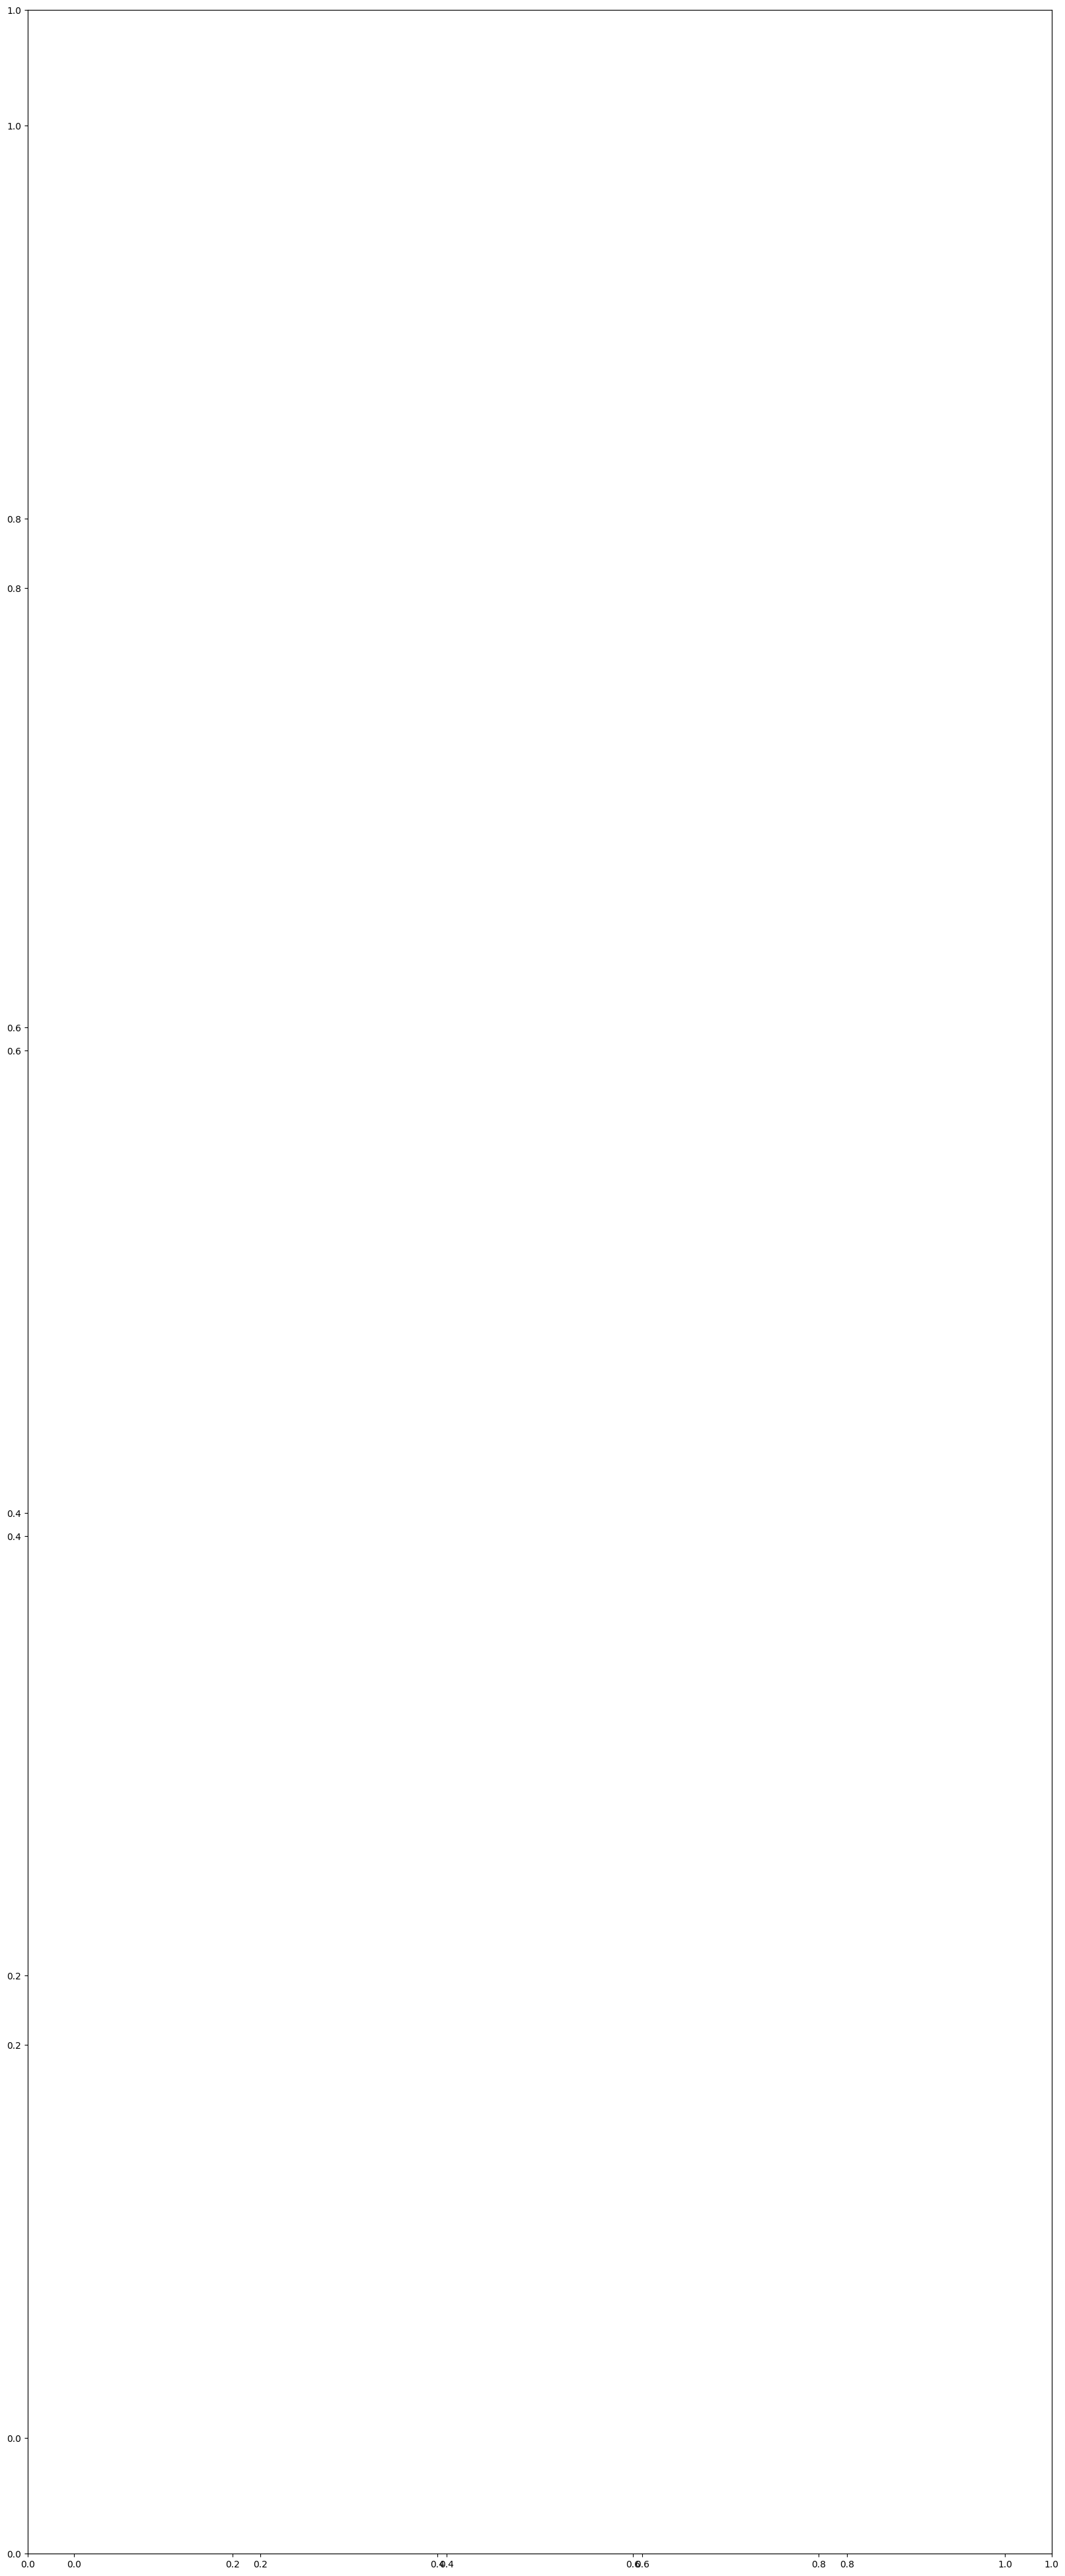

In [17]:
## plot the roc curve for the model
import numpy as np
fig = plt.figure(figsize=(20, 50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model', linewidth=3)
plt.plot(model_fpr, model_tpr, marker='.', label="Logistic")
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0], xyz[1]))

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()